# CS 418 Progress Report

### Group members: Justas Stankevicius, Neeraj Rawat, Xiudeng Zhang, Hsien-Hao Chang, Vlad Muradov

## Introduction

League of Legends is a team-based MOBA (multiplayer online battle arena) game developed by Riot Games. In League of Legends, teams of 5 players battle against each other in an attempt to destroy the other team's base. Each player plays a *champion* - an in-game character with specific abilities, strenghts, and weaknesses. Each champion is suited for different roles - some are best at dealing lots of damage to the enemy team (at the expense of being very "squishy" - that is, not having many health points or defensive capabilities), while others can sustain lots of damage but can't accomplish much without their teammates' help.

Some examples of champions:
* **Annie** - a child capable of wielding fire magic, Annie is a mage capable of dealing lots of damage at close range. She is best at killing champions with low defense, but has little to no mobility and can be easily killed if the enemy team focuses on her.
* **Malphite** - a literal walking mountain, Malphite is the quintessential League of Legends "tank", a champion capable of enduring thousands of points of damage without blinking. Malphite's abilities allow him to ram into the enemy team and knock everyone he hits into the air, enabling more powerful members of his team to come in and deal damage. However, Malphite's weakness is his low damage, meaning he generally cannot win fights on his own. He is also much better suited to dealing with physical damage (think swords and bullets) than magic damage (fireballs, curses, etc).
* **Varus** - a bow-wielding demon with two souls trapped in its body, Varus dishes out physical damage from afar, "poking" the enemy team with his powerful arrows. Varus does best when protected by someone else on his own team, as his low mobility, low health, and high damage mean that he tends to be the enemy team's focus in a fight. He is also able to launch an arrow that immobilizes enemy champions, rooting them in place.

Killing enemy players grants your team gold (which can be used to purchase powerful items) and experience (which makes your character stronger directly).

Each of the 5 players in a team occupies a specific role. These roles are generally thought of in terms of which of the 3 "lanes" the person plays in. They are:
* **Top** - top lane is generally a place for "tanks" (champions with very high defense but low damage) and "bruisers" (champions with medium defense, but ability to deal out damage if needed). Top laners tend to play on their own until the middle of the game.
* **Jungle** - the "jungle" is simply the space between all the lanes. In the jungle live various monsters, which the "jungler" can kill for gold and experience points. The jungler's priority is to launch surprise attacks ("ganks") into the enemy team's lanes and kill the enemy with the help of other players.
* **Mid** - the middle lane is primarily occupied by "carries", characters whose job it is to deal as much damage as possible and get as many kills as possible. "Carry" comes from "carrying the team on your shoulders", which indicates a carry as one of the most important players on the team. Technically, any champion can become a carry (you simply need to get lots of kills and gain an advantage over the enemy team), but some champions are more suited for this purpose than others.
* **Bot** - the bottom lane is generally occupied by two players from each team, the "carry" and the "support". However, "bot" generally refers to the carry, who plays a champion with very high physical damage (like Varus from the example above).
* **Support** - the support player's role is to aid their lane partner in engaging in fights, healing them, and granting them temporary powers. They funnel as many resources as they can into the carry, in hopes that the carry becomes powerful enough to kill the entire enemy team.

Although some champions are strong individually, they need to synergize with other champions on their team to truly shine. This leads us to the topic of "team composition", which is simply defined as the set of champions played by a team. Team composition also takes into consideration the role the champion is played in. For example, a champion like Varus is suited to playing in the bottom lane, but would probably do poorly in the jungle. Team composition can often give an indication of which team is more likely to win a game. There is even a saying in professional League of Legends that teams can "lose the game in draft", meaning create a team composition that does not synergize well, and thus lose the game.

As a quick example, here is a simple team composition:
* Top lane: Nasus
* Jungle: Nocturne
* Mid lane: Annie
* Bot lane: Varus
* Support: Nautilus

The "perfect" team composition probably does not exist, but team composition tends to boil down to one concept - diversification. In investing, one is generally advised to diversify their portfolio to improve their risk-adjusted returns. And although everyone creating their dream fantasy NBA team would *love* to have every player be Michael Jordan, such a team would most likely lose all of their games due to every player being a shooting guard. The same concept applies to League of Legends team compositions - picking champions that are all good at the same thing means the enemy team can easily counter your composition. For example, if your team consists of champions that only deal magic damage, the enemy team will most likely buy items that increase their magic resistance. Similarly, if everyone on your team has very high defense but low offense, the enemy team will simply out-damage you and win every fight. The solution is to pick champions that excel in different things, but can still synergize. A good team composition tends to include an even mix of physical and magical damage, has at least one champion that can engage in fights (preferably two), a bottom lane with high damage output, and a top lane that can either sustain lots of damage (a tank) or one that can provide both damage and defense in a fight.

When a player does well on their champion, they are rewarded at the end of the match with "mastery points". Think of these are experience points - the higher a player's mastery score on a champion, the more experienced they are at playing that champion. If two players play the same champion (which is not actually allowed, but indulge me in this example) and one has a much higher mastery score than the other, we can assume that, on average, the player with the higher mastery score will win.

With all that context out of the way, we can begin describing the purpose of our project. The objective is simple - **given two teams and certain information about each player (like the champion played by the player and the player's mastery score on that champion), we would like to predict the team most likely to win the game.** We would like to not only consider team compositions that synergize well, but also how good each player is at playing that champion.

## Changes Since the Initial Proposal

We have made minor changes since the initial proposal. Although the initial proposal wanted to consider a player's "rank" (i.e. a player's skill relative to all other players in League of Legends) as a proxy for general skill, we discovered that a rank was too general of a measure, and opted to keep track of a player's mastery score on each champion instead. The total mastery score for a player, across all champions, should rise roughly in line with their rank in the game. The main selling point is that per-champion mastery scores allow us to understand what kinds of roles a player might prefer (for example, if a player has low mastery of champions that play in the bottom lane, they would probably do poorly if put in a situation where they have to play in that lane), as well as how good they are at champions within those roles. It would have been great to have both a player's rank and mastery scores, but collecting this much data would have taken about twice as long.

**tl;dr**: We no longer consider a player's rank and are instead considering a player's mastery scores for each champion, as that gives a better insight into their skill level for each champion.

## Data

Data is collected using the Riot Games API, which allows of to query for things like a player's match history, the players that played in a particular match, what champions they played, etc. To continuously collect data, we implement a simple breadth-first search algorithm that operates as follows:
1. Start off with a single player. We call them `seed_player`. Initialize a queue that will hold a set of match IDs.
2. Get `seed_player`'s match history and put it onto the queue.
3. Looping forever, get the next match in the queue and process the relevant information from it. Do this only if we have not processed the match before.
4. If the queue is empty, add the match histories of the players from the last processed match to the queue and go to step 3.

Since this algorithm can be trivially paralellized, we utilize multiple API keys on different threads to get around the API's rate limit.

The data is stored in a SQLite database using the schema defined in `schema.sql`. The most important tables are `Matches`, which contains basic information about a match (such as who won, when the match was played, etc), `Participants` (which includes information about each player in a match, like what champion they played, how many kills they got, how many times they died, etc), and `ChampionMastery` (which contains mastery point information for each player for each champion).

## Exploratory Data Analysis

We would like to understand some basic things about the data. Two questions are fairly interesting to ask - is there an advantage to playing on a particular team (blue or red), and what are the champions with the highest and lowest win rates?

In [42]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

db_conn = sqlite3.connect("league.db")

In [43]:
# Simple test: How many champions are there in total?
sql = "SELECT COUNT(championName) as total_champions FROM Champions"
pd.read_sql(sql, con=db_conn)

,total_champions
0,161


Let's compare win rates for each team to see if there is an advantage to playing on a particular team. We expect both win rates to be very close to 50%, but with an extremely large sample size like ours, the difference in win rate is likely to be statistically significant.

In [44]:
sql2 = "SELECT SUM(winner = 100) AS Blue, SUM(winner = 200) AS Red FROM Matches"
df = pd.read_sql(sql2, con=db_conn)
df

,Blue,Red
0,379915,380223


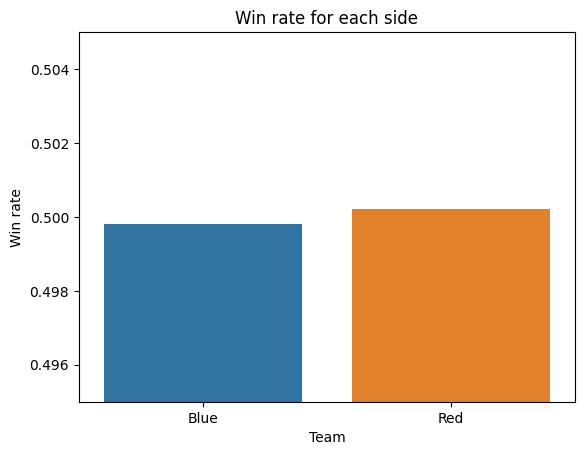

In [45]:
total = df["Blue"] + df["Red"]
df["Blue"] /= total
df["Red"] /= total
ax = sns.barplot(data=df)
plt.title("Win rate for each side")
plt.xlabel("Team")
plt.ylabel("Win rate")
plt.ylim([0.495, 0.505])
plt.show()

We would now like to know the top 10 highest-winrate champions from our dataset. We haven't filtered the data, so this may not necessarily represent the *best* champion to play in the current version of the game. However, if you picked a champion from one of the top 10 and played over the time period of this dataset, you would have likely done reasonably well.

In [46]:
# win rate for each champoin
sql3 = ("SELECT ch.championName, ch.difficulty, COUNT(m.winner) as games_won_by_champ FROM Champions as ch JOIN Participants as p on ch.championId = p.championId JOIN Matches as m on p.matchId = m.matchId WHERE m.winner = p.teamId GROUP BY ch.championName ORDER BY championName ASC")
df1 = pd.read_sql(sql3, con = db_conn)
# print(df)
sql4 = "select Champions.championName, count(*) as total from Participants join Champions on Participants.championId == Champions.championId join Matches on Matches.matchId == Participants.matchId group by championName Order BY championName"
df2 = pd.read_sql(sql4, con = db_conn)
# print(df2)
dataframe = pd.DataFrame().assign(ChampionName=df1['championName'], gamesWon=df1['games_won_by_champ'], difficulty=df1["difficulty"], total=df2['total'])
dataframe['percentage'] = np.nan
dataframe['percentage'] = dataframe['gamesWon']/dataframe['total'] * 100
dataframe['percentage'] = dataframe['percentage'].apply(lambda x: round(x, 2))
dataframe


,ChampionName,gamesWon,difficulty,total,percentage
0,Aatrox,38126,4,77641,49.11
1,Ahri,26287,5,53468,49.16
2,Akali,42954,7,88702,48.43
3,Akshan,14667,0,29751,49.30
4,Alistar,9005,7,18213,49.44
...,...,...,...,...,...
156,Zeri,7781,6,17715,43.92
157,Ziggs,13751,4,26914,51.09
158,Zilean,13225,6,25907,51.05
159,Zoe,10529,5,22270,47.28


   ChampionName  gamesWon  difficulty  total  percentage
0  Heimerdinger     24685           8  46527       53.06
1         Swain     34419           8  65237       52.76
2   Mordekaiser     46922           4  88962       52.74
3       Shyvana     15021           4  28491       52.72
4         Amumu     36142           3  68586       52.70
5          Zyra     24414           7  46381       52.64
6        Singed     12504           5  23859       52.41
7         Urgot     17712           8  33845       52.33
8        Yorick     19846           6  37923       52.33
9        Illaoi     18877           4  36108       52.28


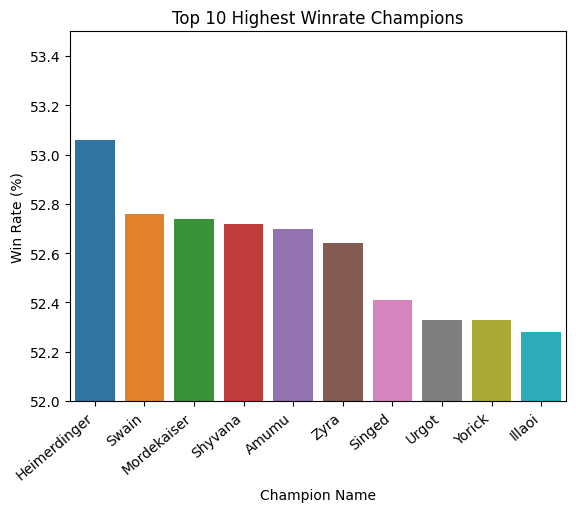

In [47]:
dataframe = dataframe.sort_values(['percentage'], ascending = False).reset_index(drop=True)
top10 = dataframe
top10 = top10.head(10)
ax = sns.barplot(x = 'ChampionName', y= 'percentage', data=top10)
ax.set_ylim(52, 53.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title("Top 10 Highest Winrate Champions")
ax.set_ylabel("Win Rate (%)")
ax.set_xlabel("Champion Name")
print(top10)

Interestingly, the top 10 champions by winrate are almost all bruisers or tanks, except Heimerdinger and Zyra. The rest could take quite a bit of damage before dying, and can themselves dish out plenty of it. The role distribution is also quite concentrated:

**Top lane**: Mordekaiser, Singed, Urgot, Yorick, Illaoi

**Middle lane**: Heimerdinger, Swain

**Jungle**: Shyvana, Amumu

**Support**: Zyra


Another thing to note is that most champions in the top 10 would be considered to have a fairly low skill ceiling by most players, and a low barrier to entry as well. In other words, one could pick up a champion in the top 10 fairly easily, as they do not require much mechanical skill or strategizing to pull off (one could argue that Heimerdinger is a high-skill ceiling champion, but I digress). Because of their low barrier to entry, the average player could pick up one of these champions and do well, assuming the champion is fairly strong in the current version of the game.

We would now like to know the bottom-10 champions by win rate. In fact, **we'll make a hypothesis: We claim that the bottom 10 champions by win rate all have the common trait of being mechanically difficult to play, at least by the standards of common League players.** We thought this would be an interesting hypothesis to explore because champions with bottom-tier win rates tend to be played in professional League championships at much higher rates than normal. Since they are mechanically difficult to play, it is the mechanically *gifted* players (i.e. professional eSports players) that can take the greatest advantage of these champions. This is frequently combined with Riot Games' tendency to "nerf" (make weaker) champions that see high win rates in professional play, making the mechanically difficult champions even less appealing to play for the average League gamer.

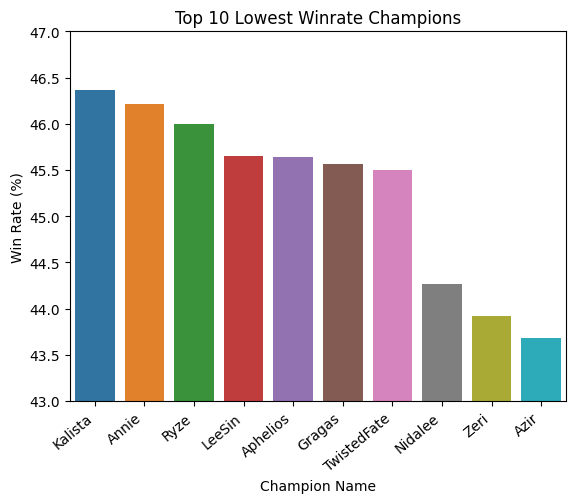

,ChampionName,gamesWon,difficulty,total,percentage
151,Kalista,8646,7,18647,46.37
152,Annie,9995,6,21629,46.21
153,Ryze,10270,7,22327,46.00
154,LeeSin,20446,6,44787,45.65
155,Aphelios,21984,10,48166,45.64
156,Gragas,10283,5,22565,45.57
157,TwistedFate,7968,9,17514,45.50
158,Nidalee,8754,8,19772,44.27
159,Zeri,7781,6,17715,43.92
160,Azir,13897,9,31815,43.68


In [48]:
low10 = dataframe.tail(10)
ax = sns.barplot(x = 'ChampionName', y= 'percentage', data=low10)
ax.set_ylim(43, 47)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title("Top 10 Lowest Winrate Champions")
ax.set_ylabel("Win Rate (%)")
ax.set_xlabel("Champion Name")
plt.show()
low10

If you've played League for a while, you'll see the usual suspects. Some of the champions in this list (Annie, Gragas) may simply be relatively weak in the current version of the game. Some, like Nidalee and Twisted Fate, may require exceptional strategizing and game knowledge to play well due to their basic kits. However, the most common reason for a champion to end up with an incredibly low win rate is due to the sheer level of mechanical skill required to play them exceptionally. Kalista, Ryze, Lee Sin, Aphelios, Zeri, and Azir all have very high skill ceilings and high barriers to entry, requiring great reaction time and knowledge of the champion's strengths and weaknesses. Aphelios, for example, became infamous when released, with many players jokingly stating that one needs a 4-digit IQ to fully understand his kit and how it works.

Let's see how this group's difficulty compares to the average difficulty of all champions in League of Legends.

In [49]:
avg_difficulty_bottom10 = low10["difficulty"].mean()
avg_difficulty_bottom10

avg_difficulty_total = dataframe["difficulty"].mean()

print("Average difficulty of the bottom 10 champions by win rate:", avg_difficulty_bottom10)
print("Average difficulty of all champions:", avg_difficulty_total)

Average difficulty of the bottom 10 champions by win rate: 7.3
Average difficulty of all champions: 5.6894409937888195


As we can see, the bottom 10 champions by win rate *do* have a much higher difficulty than the average champion in League. Let's make a quick graph and see if there is a general correlation between difficulty and win rate:

win_rate ~ -0.20342844719007866*difficulty + 50.86869849457216


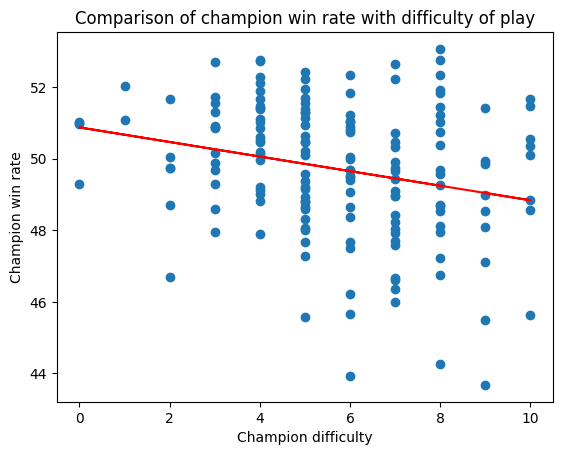

In [65]:
plt.scatter(dataframe["difficulty"], dataframe["percentage"])
a, b = np.polyfit(dataframe["difficulty"], dataframe["percentage"], 1)
print(f"win_rate ~ {a}*difficulty + {b}")
plt.plot(dataframe["difficulty"], a*dataframe["difficulty"]+b, color="red")
plt.xlabel("Champion difficulty")
plt.ylabel("Champion win rate")
plt.title("Comparison of champion win rate with difficulty of play")
plt.show()

## ML Analysis

WIP

## Reflection

Overall, this has been a very fun project, in part due to the difficulty of the problem itself, and in part because we as current or former League players have invested substantial time into the game, and would like to gain some insights. The most challenging part so far has definitely been data acquisition. The script took nearly a month to realize its final form, and even while data is being pulled it is still being modified. The difficulty is twofold:
1. The number of possible team compositions is incomprehensibly large. Granted, when considering only *viable* team compositions the number becomes slightly smaller, but it is still in the quintillions/sextillions/septillions. Our model may understand "common" team compositions very well, but fall apart completely when we give it two nonsensical team compositions.
2. The amount of data which we can pull is bottlenecked by the API rate limit. Assuming one has a match ID, it takes 11 API calls to process a match completely: 1 to get detailed data about the match using the ID, and 10 to get the mastery scores of each player. If we collect even one more statistic (like rank, for example) and introduce more API calls on a per-player basis, we will be cutting our data acquisition rate in half, or worse.